# Capstone Project — The Battle of Neighbourhoods
## Introduction
New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .
Questions that can be asked using the above mentioned datasets
What is best location in New Delhi City for Chinese Cuisine ?
Which areas have large number of Chinese Resturant Market ?
Which all areas have less number of resturant ?
Which is the best place to stay if I prefer Chinese Cuisine ?
What places are have best restaurant in New Delhi?
## Data
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : Zomato kaggel dataset
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood.
## Approach
1. Collect the new delhi city data from Zomato kaggel dataset
2. Using FourSquare API we will find all venues for each neighborhood.
3. Filter out all venues that are nearby by locality.
4. Using aggregative rating for each resturant to find the best places.
5. Visualize the Ranking of neighborhoods using folium library(python)

In [31]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 102kB 8.6MB/s ta 0:00:011


In [32]:

df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [33]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [34]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [35]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [38]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [40]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

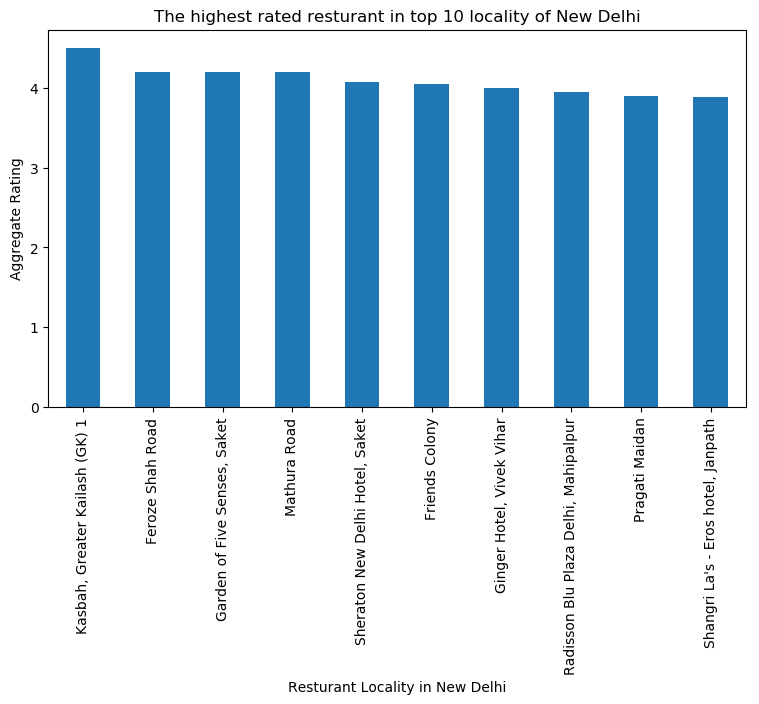

In [42]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

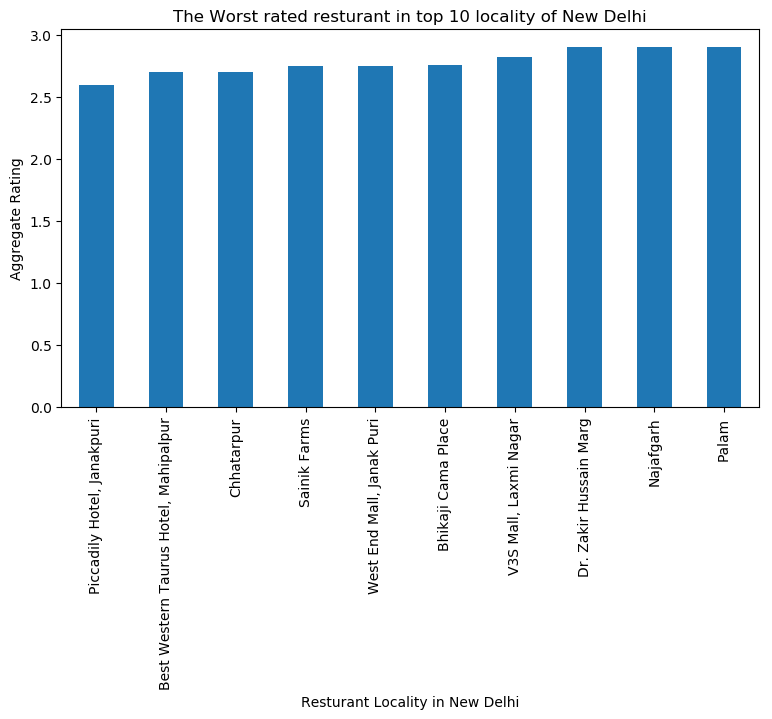

In [43]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

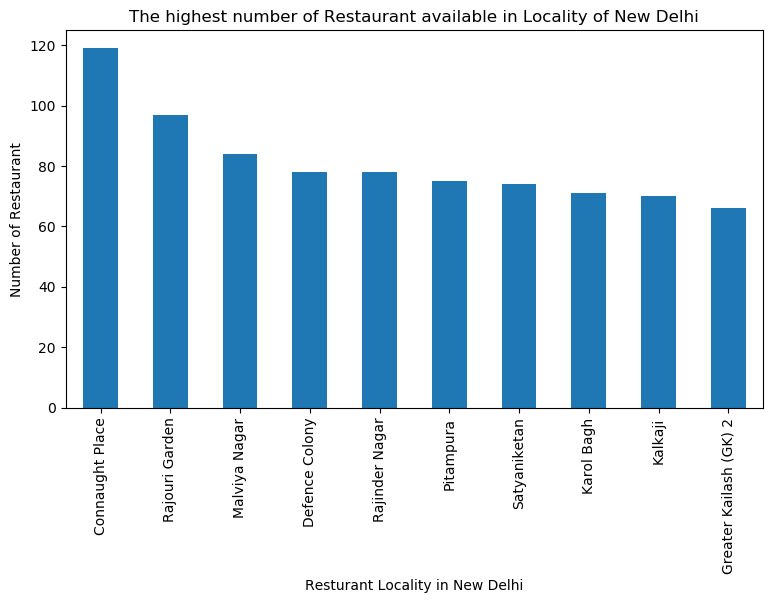

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

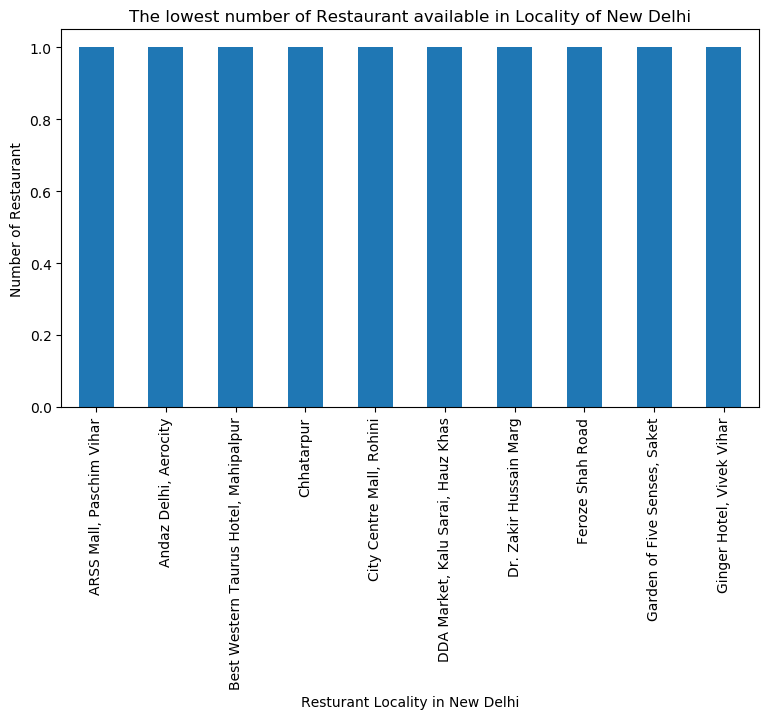

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

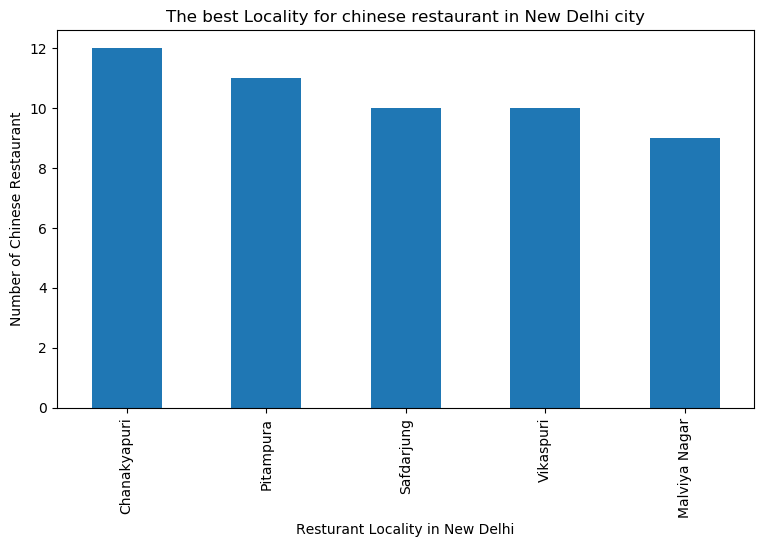

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

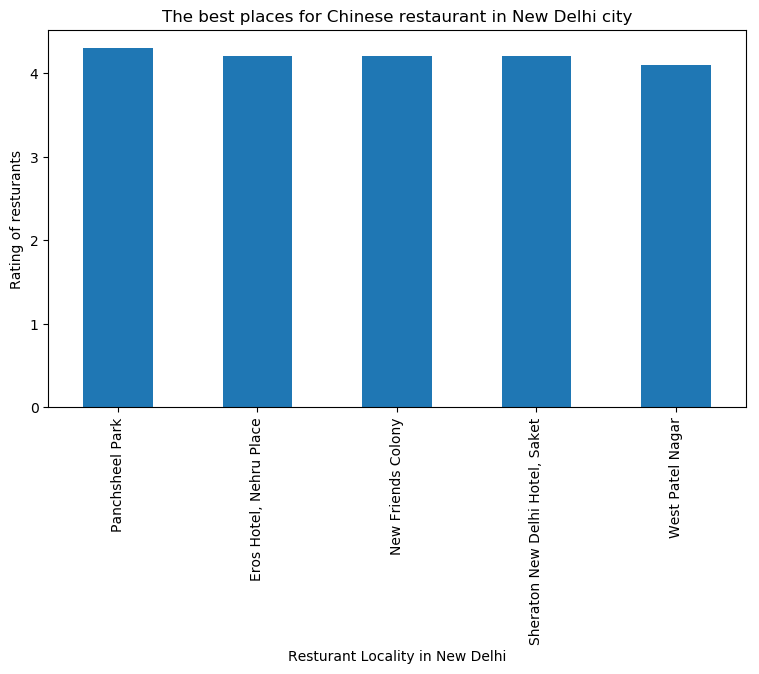

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [48]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [49]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [50]:
df_final.shape

(240, 8)

In [51]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'SBL3TCTU5OBR4QO1CHM0U4KJEBOUAHK5VX5FY2SJDVI33JX3' # Foursquare ID
CLIENT_SECRET = 'IU1V5ZDJ0SXGL0GHKO1WTIW141PZJLHEJ3Y3FOGO0YM3D4HO' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SBL3TCTU5OBR4QO1CHM0U4KJEBOUAHK5VX5FY2SJDVI33JX3
CLIENT_SECRET:IU1V5ZDJ0SXGL0GHKO1WTIW141PZJLHEJ3Y3FOGO0YM3D4HO


In [54]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )


ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [56]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1              Café Coffee Day       28.670009        77.102480   
2                    Pizza Hut       28.670321        77.103853   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Coffee Shop  
2         Pizza Place  
3   Indian Restaurant  
4  Chinese Restaurant

In [57]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         8   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   6   
Aggarwal City Plaza, Rohini                                     7   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     6   
Andaz Delhi, Aerocity                                          28   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             6   
Ashok Vihar Phase 2                                             6   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                14   
Basant Lok Market, Vasant Vihar                                27   
Bellagio, Ashok Vihar Phase 2                                   6   
Best Western Taurus Hotel, Mahipalpur                          11   
Bhikaji Cama Place                                             13   
Chanakyapuri                                                    4   
Chander Nagar                                                   1   
Chandni Chowk                                                  15   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               9   
City Centre Mall, Rohini                                       11   
City Square Mall, Rajouri Garden                               24   
Civil Lines                                                     4   
...                                                           ...   
The Lalit New Delhi, Barakhamba Road                            7   
The Leela Ambience Convention Hotel                             6   
The Leela Palace, Chanakyapuri                                 14   
The Lodhi, Lodhi Road                                          13   
The Park, Connaught Place                                      27   
The Suryaa New Delhi, New Friends Colony                       20   
The Taj Mahal Hotel, Mansingh Road                              7   
The Taj Palace Hotel, Chanakyapuri                             35   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 13   
Tilak Nagar                                                     7   
Tughlakabad Institutional Area                                  4   
Uday Park                                                       7   
Unity One Mall, Janakpuri                                       8   
Uttam Nagar                                                     4   
V3S Mall, Laxmi Nagar                                          15   
Vasant Kunj                                                     8   
Vasant Square Mall, Vasant Kunj                                10   
Vasant Vihar                                                   29   
Vasundhara Enclave                                              1   
Vijay Nagar                                                    10   
Vikas Marg                                                      5   
Vikaspuri                                                       3   
Vivek Vihar                                                     6   
West End Mall, Janak Puri                                      15   
West Gate Mall, Rajouri Garden                

In [58]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 214 uniques categories.


In [59]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   Airport  Airport Food Court  Airport Lounge  Airport Service  \
0        0                   0               0                0   
1        0                   0               0                0   
2        0                   0               0                0   
3        0                   0               0                0   
4        0                   0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 215 columns]

In [60]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
208            The Lalit New Delhi, Barakhamba Road  0.000000   
209             The Leela Ambience Convention Hotel  0.000000   
210                  The Leela Palace, Chanakyapuri  0.000000   
211                           The Lodhi, Lodhi Road  0.000000   
212                       The Park, Connaught Place  0.000000   
213        The Suryaa New Delhi, New Friends Colony  0.000000   
214              The Taj Mahal Hotel, Mansingh Road  0.000000   
215              The Taj Palace Hotel, Chanakyapuri  0.000000   
216                             The Uppal, Aerocity  0.000000   
217  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
218                                     Tilak Nagar  0.000000   
219                  Tughlakabad Institutional Area  0.000000   
220                                       Uday Park  0.000000   
221                       Unity One Mall, Janakpuri  0.000000   
222                                     Uttam Nagar  0.250000   
223                           V3S Mall, Laxmi Nagar  0.000000   
224                                     Vasant Kunj  0.000000   
225                 Vasant Square Mall, Vasant Kunj  0.000000   
226                                    Vasant Vihar  0.000000   
227                              Vasundhara Enclave  0.000000   
228                                     Vijay Nagar  0.000000   
229                                      Vikas Marg  0.000000   
230                                       Vikaspuri  0.000000   
231                                     Vivek Vihar  0.000000   
232                       West End Mall, Janak Puri  0.000000   
233                  West Gate Mall, Rajouri Garden  0.000000   
234                                West Patel Nagar  0.000000   
235                           Worldmark 1, Aerocity  0.000000   
236                                     Yusuf Sarai  0.000000   
237                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [61]:
New_Delhi_grouped.shape

(238, 215)

In [62]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2  Multicuisine Indian Restaurant  0.11
3              Chinese Restaurant  0.11
4                  Sandwich Place  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.25
1               Café  0.25
2           Boutique  0.12
3                Pub  0.12
4         Restaurant  0.12


----Aditya Mega Mall, Karkardooma----
               venue  freq
0          Multiplex   0.2
1        Pizza Place   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1           Coffee Shop  0.14
2        Airport Lounge  0.14
3  Fast Food Restaurant  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0     Indian Restaurant  0.50
1  Fast Food Restaurant  0.17
2      Departmen

In [63]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                                           Adchini     Indian Restaurant   
2                     Aditya Mega Mall, Karkardooma           Pizza Place   
3                                          Aerocity                 Hotel   
4                     Aggarwal City Mall, Pitampura     Indian Restaurant   
5                       Aggarwal City Plaza, Rohini  Fast Food Restaurant   
6                                         Alaknanda            Steakhouse   
7                        Ambience Mall, Vasant Kunj           Coffee Shop   
8                                         Anand Lok                  Café   
9                                       Anand Vihar                  Café   
10                            Andaz Delhi, Aerocity                 Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg  Fast Food Restaurant   
12                                    Asaf Ali Road                 Hotel   
13                              Ashok Vihar Phase 1            Smoke Shop   
14                              Ashok Vihar Phase 2           Pizza Place   
15                              Ashok Vihar Phase 3           Pizza Place   
16                                  Barakhamba Road     Indian Restaurant   
17                  Basant Lok Market, Vasant Vihar                  Café   
18                    Bellagio, Ashok Vihar Phase 2           Pizza Place   
19            Best Western Taurus Hotel, Mahipalpur                 Hotel   
20                               Bhikaji Cama Place                 Hotel   
21                                     Chanakyapuri                  Park   
22                                    Chander Nagar           Pizza Place   
23                                    Chandni Chowk     Indian Restaurant   
24                                     Chawri Bazar  Fast Food Restaurant   
25                                       Chhatarpur                 Hotel   
26                                Chittaranjan Park  Fast Food Restaurant   
27                         City Centre Mall, Rohini         Shopping Mall   
28                 City Square Mall, Rajouri Garden  Fast Food Restaurant   
29                                      Civil Lines    Chinese Restaurant   
..                                              ...                   ...   
208            The Lalit New Delhi, Barakhamba Road     Indian Restaurant   
209             The Leela Ambience Convention Hotel           Pizza Place   
210                  The Leela Palace, Chanakyapuri     Indian Restaurant   
211                           The Lodhi, Lodhi Road     Indian Restaurant   
212                       The Park, Connaught Place                 Hotel   
213        The Suryaa New Delhi, New Friends Colony                  Café   
214              The Taj Mahal Hotel, Mansingh Road             Hotel Bar   
215              The Taj Palace Hotel, Chanakyapuri     Indian Restaurant   
216                             The Uppal, Aerocity                 Hotel   
217  The Village Restaurant Complex, Khel Gaon Marg                   Bar   
218                                     Tilak Nagar  Fast Food Restaurant   
219                  Tughlakabad Institutional Area            Restaurant   
220                                       Uday Park           Pizza Place   
221                       Unity One Mall, Janakpuri     Indian Restaurant   
222                                     Uttam Nagar     Indian Restaurant   
223                           V3S Mall, Laxmi Nagar             Gift Shop   
224                                     Vasant Kunj           Pizza Place   
225                 Vasant Square Mall, Vasant Kunj                   Spa   
226                                    Vasant Vihar                  Café   
227                              Vasundhara Enclave                  Café   
228                                    

In [65]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [68]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               1   
3                         Average           59               3   
4                         Average          126               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Coffee Shop   
1     Indian Restaurant                  Café                   Pub   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel           Coffee Shop  Fast Food Restaurant   
4     Indian Restaurant      Department Store  Fast Food Restaurant   

  4th Most Common Venue   5th Most Common Venue  \
0        Sandwich Place      Chinese Restaurant   
1                 Hotel              Restaurant   
2             Multiplex                   Hotel   
3        Airport Lounge        Airport Terminal   
4           Pizza Place  Furniture / Home Store   

            6th Most Common Venue   7th Most Common Venue  \
0  Multicuisine Indian Restaurant                  Market   
1                        Boutique             Flea Market   
2                            Café      Dim Sum Restaurant   
3             Rental Car Location  Furniture / Home Store   
4              Frozen Yogurt Shop     Fried Chicken Joint   

  8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
0           Pizza Place  Eastern European Restaurant            Flea Market  
1                  Food            Food & Drink Shop          Women's Store  
2     Fish & Chips Shop          Fried Chicken Joint           Dessert Shop  
3    Frozen Yogurt Shop          Fried Chicken Joint      French Restaurant  
4     French Restaurant                   Food Truck             Food Court

In [69]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
9    28.659870    3.281481                        Average, Good         1309   
21   28.589797    3.085714                  Average, Good, Poor         1617   
85   28.648885    3.561111             Average, Good, Very Good         7411   
107  28.569394    3.252381                        Average, Good         1525   
174  28.550802    3.250000                        Average, Good           34   
179  28.572117    3.871429             Average, Good, Very Good         1871   
181  28.571849    3.316667                        Average, Good          472   
227  28.559704    3.278261             Average, Good, Very Good         1043   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
9                 0                  Café          Dessert Shop   
21                0                  Park          Concert Hall   
85                0     Indian Restaurant         Metro Station   
107               0           Pizza Place                Market   
174               0                 Hotel     Indian Restaurant   
179               0             Multiplex           Coffee Shop   
181               0  Fast Food Restaurant           Pizza Place   
227               0                  Café  Fast Food Restaurant   
229               0                  Café              Tea Room   

    3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
9            Burger Joint                    Park         Burrito Place   
21                  Trail                    Café         Women's Store   
85     Frozen Yogurt Shop                  Mosque           Flea Market   
107           Coffee Shop       Indian Restaurant                  Café   
174           Coffee Shop        Department Store         Shopping Mall   
179      Asian Restaurant                    Café       Thai Restaurant   
181           Snack Place  Furniture / Home Store    Frozen Yogurt Shop   
227            Restaurant      Chinese Restaurant           Coffee Shop   
229             Pet Store     American Restaurant                Bakery   

       6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
9                Flea Market  Furniture / Home Store      Frozen Yogurt Shop   
21         Fish & Chips Shop  Furniture / Home Store      Frozen Yogurt Shop   
85               Snack Place           Women's Store  Furniture / Home Store   
107               Donut Shop    Fast Food Restaurant          Sandwich Place   
174                     Café              Restaurant            Cocktail Bar   
179  Comfort Food Restaurant       Electronics Store       Convenience Store   
181      Fried Chicken Joint       French Restaurant              Food Truck   
227               Donut Shop            Cocktail Bar                     Pub   
229     Fast Food Restaurant             Coffee Shop             Cheese Shop   

    9th Most Common Venue 10th Most Common Venue  
9     Fried Chicken Joint      French Restaurant  
21    Fried Chicken Joint      French Restaurant  
85    Fried Chicken Joint      French Restaurant  
107   Sporting Goods Shop     Chinese Restaurant  
174    Punjabi Restaurant    Dumpling Restaurant  
179         Shopping Mall                   Park  
181            Food Court      Food & Drink Shop  
227      Department Store     Italian Restaurant  
229    Chinese Restaurant          Women's Store

In [71]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
2    28.656131    3.275000                              Average, Good   
5    28.700516    3.040000                        Average, Good, Poor   
22   28.654105    3.085714                                    Average   
26   28.538688    3.130303                        Average, Good, Poor   
30   28.561898    3.100000                              Average, Good   
33   28.657388    3.320000                              Average, Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
50   28.645084    3.235000             Average, Good, Poor, Very Good   
57   28.699837    3.376471                   Average, Good, Very Good   
72   28.705700    3.350000                              Average, Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
93   28.554084    3.541667                   Average, Good, Very Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
103  28.652501    3.080000                        Average, Good, Poor   
106  28.575525    3.126316                              Average, Good   
109  28.689561    3.311111                         Average, Very Good   
129  28.523047    2.925000                                    Average   
131  28.705307    3.800000                                       Good   
134  28.656939    3.234783             Average, Good, Poor, Very Good   
142  28.693270    3.519149                   Average, Good, Very Good   
146  28.535040    3.175000                              Average, Good   
151  28.592153    3.200000                                    Average   
160  28.712975    3.066667                                    Average   
169  28.667261    3.200000                                    Average   
170  28.643757    3.575000                              Average, Good   
177  28.511482    2.750000                              Average, Poor   
180  28.534499    3.000000                        Average, Good, Poor   
189  28.620715    3.880000                   Average, Good, Very Good   
207  28.625445    3.600000                   Average, Good, Very Good   
209  28.631362    3.537500                              Average, Good   
213  28.623619    3.466667                              Average, Good   
218  28.552403    3.833333                            Good, Very Good   
220  28.523519    3.700000                                       Good   
224  28.636921    2.819231                        Average, Good, Poor   
225  28.524070    3.686364                   Average, Good, Very Good   
230  28.658041    3.400000                                    Average   
233  28.695096    3.050000                                    Average   
234  28.630044    2.750000                              Average, Poor   

     No_of_Votes  Cluster Labels       1st Most Common Venue  \
2            434               1                 Pizza Place   
5            594               1        Fast Food Restaurant   
22            80               1                 Pizza Place   
26          2578               1        Fast Food Restaurant   
30          1514               1                        Café   
33           636               1                 Pizza Place   
45         19479               1                        Café   
50          2578               1                 Pizza Place   
57          2460               1                 Pizza Place   
72           278               1          Light Rail Station   
88          9119               1           Indian Restaurant   
89           893               1              Soccer Stadium   
93          3781               1            Department Store   
100          524               1                        Café   
102        28463               1                        C

In [72]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
11   28.562580    3.750000                   Average, Good, Very Good   
14   28.693969    3.378571                              Average, Good   
17   28.557846    3.220000                        Average, Good, Poor   
18   28.696302    3.300000                              Average, Good   
20   28.568193    2.755556                              Average, Poor   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
42   28.576161    2.983333                        Average, Good, Poor   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
47   28.681582    3.046875                        Average, Good, Poor   
48   28.630149    2.950000                        Average, Good, Poor   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
54   28.543798    3.500000                              Average, Good   
58   28.514237    4.200000                                  Very Good   
..         ...         ...                                        ...   
184  28.528743    3.764000  Average, Excellent, Good, Poor, Very Good   
185  28.683364    3.000000                              Average, Good   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
187  28.629634    2.942857                                    Average   
190  28.577107    3.100000                                    Average   
191  28.522279    3.100000                                    Average   
192  28.526856    4.066667                                  Very Good   
193  28.569983    3.133333                        Average, Good, Poor   
194  28.566717    3.303125                   Average, Good, Very Good   
195  28.527731    3.450000                              Average, Good   
197  28.592724    2.985714                                    Average   
199  28.601779    3.700000                   Average, Good, Very Good   
200  28.564288    3.200000                                    Average   
201  28.651299    3.500000                              Average, Good   
202  28.646593    3.280952                   Average, Good, Very Good   
203  28.601187    3.633333                              Average, Good   
205  28.600171    3.714286                   Average, Good, Very Good   
206  28.538993    3.450000                              Average, Good   
210  28.661133    3.775000                            Good, Very Good   
211  28.579556    3.780000                                       Good   
212  28.592147    3.350000                              Average, Good   
214  28.561105    3.425000                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good

In [73]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
59   28.654883    3.053846                        Average, Good          262   
68   28.554275    3.845833  Average, Excellent, Good, Very Good        32573   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
71   28.641003    3.650000                        Average, Good          367   
73   28.643036    3.000000                              Average            7   
82   28.548371    3.137500                  Average, Good, Poor          609   
110  28.635391    3.040385       Average, Good, Poor, Very Good         2442   
111  28.618772    3.666667             Average, Good, Very Good          725   
118  28.646549    3.200000                              Average           20   
127  28.619410    3.134615                  Average, Good, Poor         1648   
145  28.525674    3.300000                              Average           27   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 3                 Hotel           Coffee Shop   
10                3                 Hotel     Indian Restaurant   
12                3                 Hotel      Asian Restaurant   
19                3                 Hotel    Italian Restaurant   
25                3                 Hotel   Japanese Restaurant   
35                3                 Hotel      Department Store   
56                3                 Hotel          Neighborhood   
59                3                   NaN                   NaN   
68                3     Indian Restaurant                  Café   
69                3                 Hotel     Indian Restaurant   
70                3                 Hotel            Restaurant   
71                3     Indian Restaurant                 Hotel   
73                3           Pizza Place        Ice Cream Shop   
82                3        Clothing Store         Shopping Mall   
110               3           Pizza Place             Multiplex   
111               3                 Hotel          Cocktail Bar   
118               3            Restaurant     Indian Restaurant   
127               3           Wings Joint             Juice Bar   
145               3     Electronics Store        Cosmetics Shop   
148               3           

In [74]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
4    28.690020    3.033333                              Average          126   
13   28.690182    3.090000                  Average, Good, Poor          971   
15   28.691136    3.390909             Average, Good, Very Good          485   
16   28.630440    3.208333                  Average, Good, Poor         1779   
23   28.656414    3.358182             Average, Good, Very Good         6668   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000                  Average, Good, Poor         1106   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
60   28.665829    4.000000                            Very Good          756   
75   28.569040    3.800000                      Good, Very Good         1513   
76   28.576785    3.200000                        Average, Good          143   
83   28.552895    3.300000                              Average           15   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
91   28.556503    3.400000                        Average, Good          346   
96   28.516316    3.200000                              Average           95   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
112  28.552036    3.500000                                 Good           26   
115  28.588675    3.285714             Average, Good, Very Good         3311   
117  28.529663    3.640000             Average, Good, Very Good         1945   
123  28.626791    3.250000                              Average           57   
125  28.627715    3.125000                        Average, Good          171   
132  28.706295    3.256000             Average, Good, Very Good         1717   
139  28.613451    2.900000                              Average            4   
143  28.564494    3.140625             Average, Good, Very Good         1548   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
159  28.613748    3.900000                   Average, Excellent         2313   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
198  28.636712    3.023529                        Average, Poor          185   
208  28.562469    2.971429                  Average, Good, Poor          486   
221  28.560593    3.733333             Average, Good, Very Good          615   
222  28.628988    3.260000                  Average, Good, Poor          239   

     Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
0                 4     Indian Restaurant                            ATM   
1                 4     Indian Restaurant                           Café   
4                 4     Indian Restaurant               Department Store   
13                4            Smoke Shop                   Dessert Shop   
15                4           Pizza Place        South Indian Restaurant   
16                4     Indian Restaurant                          Hotel   
23                4     Indian Restaurant                    Snack Place   
43                4     Indian Restaurant                          Hotel   
46                4     Indian Restaurant                  Train Station   
49                4     Indian Restaurant             Italian Restaurant   
55                4     Indian Restaurant                  Women's Store   
60                4                 Hotel               Asian Restaurant   
75                4                 Hotel                     

## Conclusion
1. Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
2. Pancsheel park, Nehru place have the best Chinese Resturant.
3. Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
4. Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. #### Cluster 1: It is most recommended for Indian Restaurants. #### Cluster 2: It is most recommended for Hotels and nightclub. #### Cluster 3 and Cluster 5: It is most recommended for Fast food. #### Cluster 4: It is most recommended for the cafe and pizza.